In [1]:
import numpy as np
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Plot for genre

In [9]:
def genre_count(groups, n):

    count = np.zeros(n)
    for i, genre in groups:
        count[i] = len(genre)

    plt.style.use('seaborn')

    X = np.arange(n) + 1
    Y = count

    plt.bar(X, Y,
        tick_label=['Pop', 'Hip Hop', 'Folk, World\n& Country', 'Electronic', 'Funk / Soul', 'Rock'],
        color=['#E74C3C', '#AF7AC5', '#5DADE2', '#48C9B0', '#F4D03F', '#EB984E'])

    for x, y in zip(X, Y):
        plt.text(x, y, int(y), ha='center', va='bottom')

    plt.xlabel("Genre")
    plt.ylabel("Number")
    # plt.savefig('graphs/genre_number.png', dpi=200)
    plt.show()

In [5]:
# load data and group according to genre
df = pd.read_csv('../updated_song_map.csv')
groups = df.groupby('genre_map')
n_genres = 6

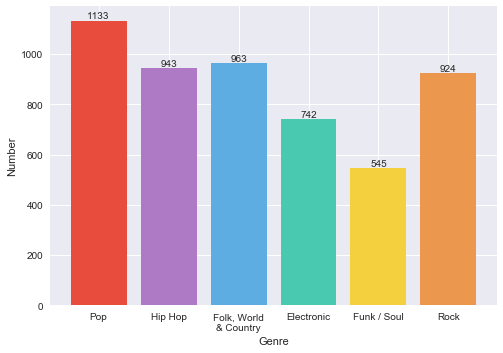

In [10]:
# Count the entries of each genre and plot
genre_count(groups, n_genres)

## Word Cloud

For visualization, we created word clouds to provide a intuitional view of what were the most frequent words in the lyrics of each genres. The `wordcloud` library in Python has provided a convenient way to create personalized word clouds. You can install it using `pip`:

`$ pip install wordcloud`

We first created word clouds for 30 most common words in each genre. The genres are respectively Pop, Hip Hop, Folk&World&Country, Electronic, Funk/Soul and Rock. The bigger the words are, the more frequent they appeared in each genre.

In [25]:
def word_cloud(groups):
    plt.figure(figsize=(15, 15))
    for i, genre in groups:
        plt.subplot(2, 3, i+1)
        # print(genre)
        songs = genre["preprocessed_lyrics"].values
        words = []
        for song in songs:
            song = re.sub("\[|\]|\'|\s", "", song)
            words.extend(song.split(","))
        cloud_dict = {}
        for index, (word, count) in enumerate(Counter(words).most_common(30)):
            cloud_dict[word] = count

        plt.style.use('seaborn')
        wc = WordCloud(
            scale=2,
            max_font_size=100,
            background_color='#383838',
            colormap='Blues')

        wc.generate_from_frequencies(frequencies=cloud_dict)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

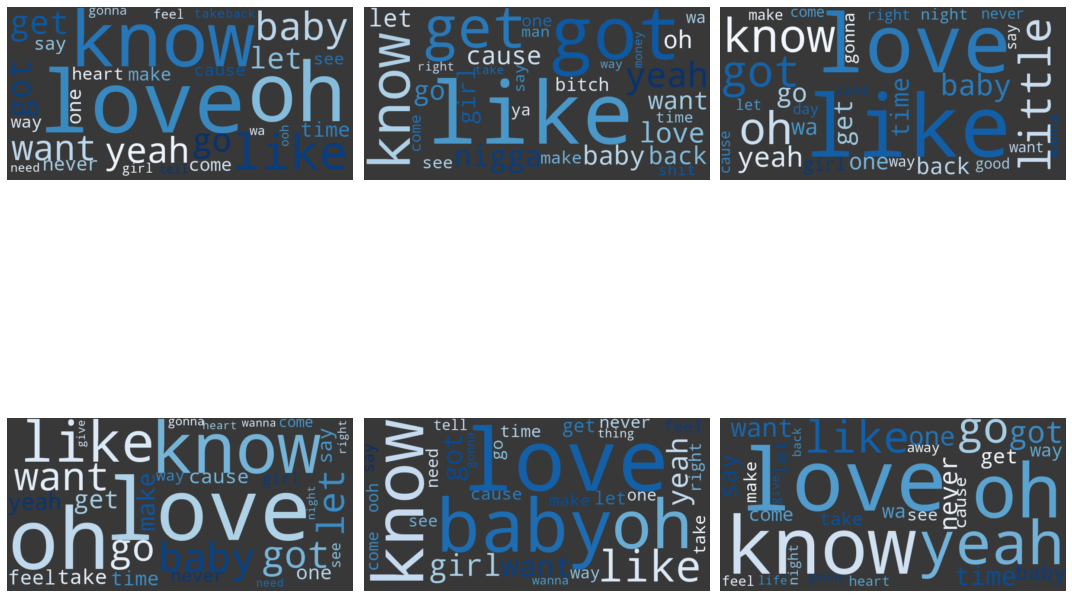

In [26]:
# Creating word cloud for each genre
word_cloud(groups)

However, we notice that the words in each genre were really similar to each other. For example, the word "love" is the most or second most frequent word in 5 of 6 genres. Some specific words such as "like" and "know" are common in half of the genres. We believe that this is the reason for our poor result in classification. To show some differences between each genre, we try to pick the top 15-45 words in each genre instead of the top 30 and create the word clouds again.

In [28]:
def word_cloud2(groups):
    plt.figure(figsize=(15, 15))
    for i, genre in groups:
        plt.subplot(2, 3, i+1)
        # print(genre)
        songs = genre["preprocessed_lyrics"].values
        words = []
        for song in songs:
            song = re.sub("\[|\]|\'|\s", "", song)
            words.extend(song.split(","))

        cloud_dict = {}
        for index, (word, count) in enumerate(Counter(words).most_common(45)):
            if index > 15:
                cloud_dict[word] = count
        plt.style.use('seaborn')
        wc = WordCloud(
            scale=2,
            max_font_size=100,
            background_color='#383838',
            colormap='Oranges')

        wc.generate_from_frequencies(frequencies=cloud_dict)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

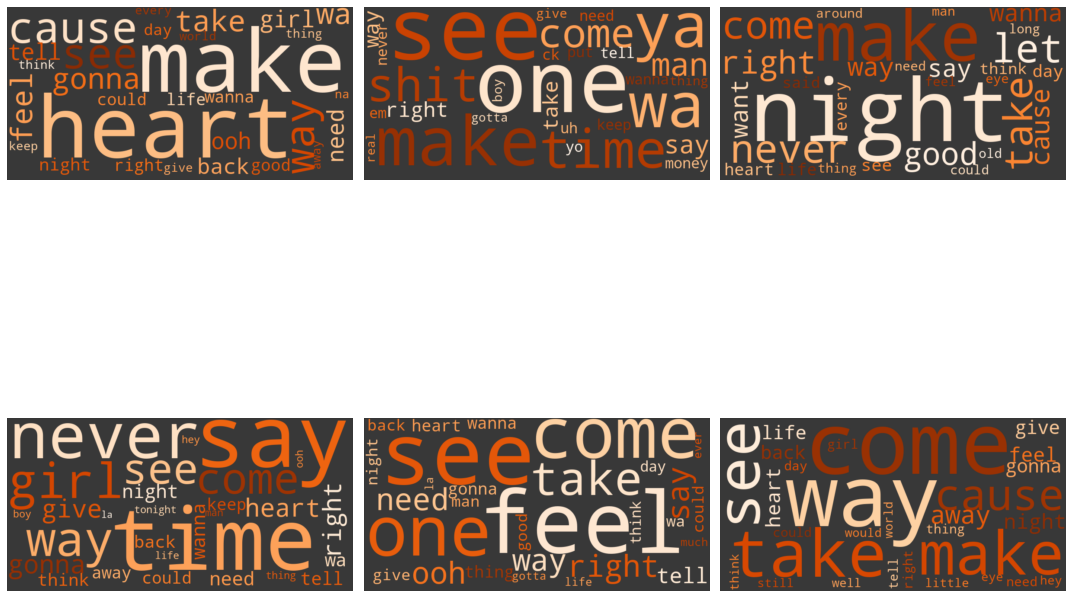

In [29]:
# Creating word cloud for each genre
word_cloud2(groups)